In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Build a simple classifier

In [2]:
X = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])
y = [0, 1, 1, 0, 0, 1, 1, 0]

class_0 = np.array([X[i] for i in range(len(X)) if y[i] == 0])
class_1 = np.array([X[i] for i in range(len(X)) if y[i] == 1])

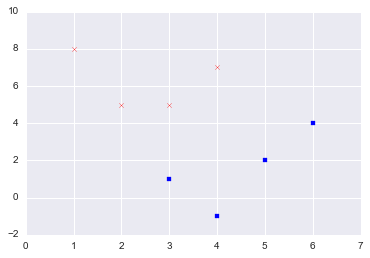

In [3]:
plt.scatter(class_0[:,0], class_0[:,1], color='blue', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='red', marker='x');

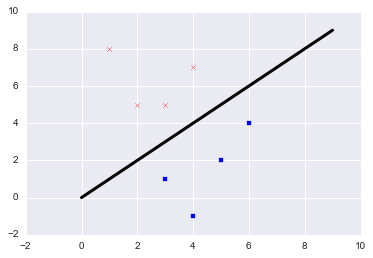

In [4]:
line_x = np.arange(10)
line_y = line_x

plt.scatter(class_0[:,0], class_0[:,1], color='blue', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='red', marker='x')
plt.plot(line_x, line_y, color='black', linewidth=3);

# Logistic Regression

In [5]:
from sklearn import linear_model

In [6]:
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [13]:
# going to plot a few things, so creating a plotting function

def plot_classifier(classifier, X, y, title):
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0
    
    step_size = 0.01
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    mesh_output = mesh_output.reshape(x_values.shape)
    
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    plt.scatter(X[:,0], X[:,1], c=y, s=80, cmap=plt.cm.Paired)
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    plt.title(title)
    plt.show();

In [14]:
def log_regression_classifier(C, X, y, title):
    classifier = linear_model.LogisticRegression(solver='liblinear', C=C)
    classifier.fit(X, y)
    plot_classifier(classifier, X, y, title)

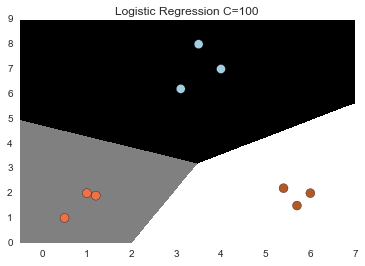

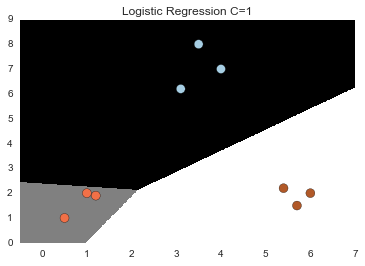

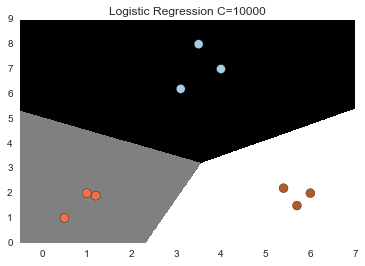

In [15]:
log_regression_classifier(100, X, y, 'Logistic Regression C=100')
log_regression_classifier(1, X, y, 'Logistic Regression C=1')
log_regression_classifier(10000, X, y, 'Logistic Regression C=10000')

# C is essentially penalty for misclassification

# Naive Bayes Classifier

In [59]:
# import data
reg_data = pd.read_csv("data/data_multivar2.csv", header=None)
X = np.array([reg_data[0],reg_data[1]]).T
y = np.array([reg_data[2]]).T.ravel()

print "Reg_data.head()\n", reg_data.head()
print "Top of X: \n", X[:5]
print "Top of y: \n", y[:5]
print "Shape of X is: ", X.shape
print "Shape of y is: ", y.shape

Reg_data.head()
      0     1  2
0  8.73  0.31  2
1  4.71 -0.42  3
2  4.58  6.18  1
3  9.38  2.18  2
4  4.78  5.28  1
Top of X: 
[[ 8.73  0.31]
 [ 4.71 -0.42]
 [ 4.58  6.18]
 [ 9.38  2.18]
 [ 4.78  5.28]]
Top of y: 
[2 3 1 2 1]
Shape of X is:  (400, 2)
Shape of y is:  (400,)


In [51]:
from sklearn.naive_bayes import GaussianNB

In [60]:
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

accuracy = 100.0 * (y==y_pred).sum() / X.shape[0]
print "Accuracy of classifier: ", round(accuracy, 2), "%"

Accuracy of classifier:  99.5 %


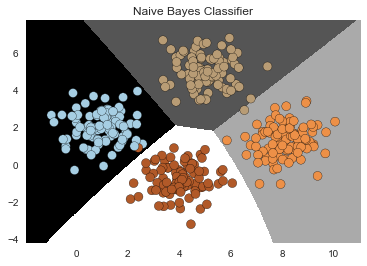

In [61]:
plot_classifier(classifier_gaussiannb, X, y, 'Naive Bayes Classifier')

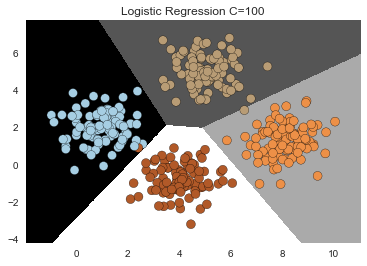

In [62]:
log_regression_classifier(100, X, y, 'Logistic Regression C=100')

# Train-Test-Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

#X_train = X_train.reshape(-1,1) # had to reshape the X vectors to fix warnings
#X_test = X_test.reshape(-1,1)
print X_train.shape
print X_test.shape
print y_test.shape

(300, 2)
(100, 2)
(100,)


In [75]:
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)
y_test_pred = classifier_gaussiannb_new.predict(X_test)


accuracy = 100.0 * (y_test==y_test_pred).sum() / X_test.shape[0]
print "Accuracy of classifier: ", round(accuracy, 2), "%"

Accuracy of classifier:  98.0 %


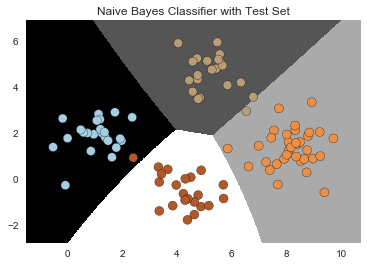

In [77]:
plot_classifier(classifier_gaussiannb_new, X_test, y_test, 'Naive Bayes Classifier with Test Set')

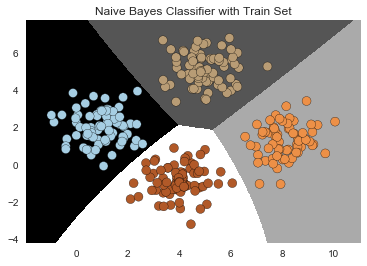

In [78]:
plot_classifier(classifier_gaussiannb_new, X_train, y_train, 'Naive Bayes Classifier with Train Set')
# should classify things perfectly... notice background shapes are the same

# Cross-Validation

**Precision & Recall**

Precision = True Positives / (True Positives + False Positives)

Recall = True Positives / (True Positives + False Negatives)

---

Accuracy = (True Positives + True Negatives) / (All Samples)

F1 = 2 x Precision x Recall / (Precision + Recall)

In [80]:
from sklearn import model_selection

In [81]:
num_validations = 5
accuracy = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='accuracy', cv=num_validations)
f1 = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='f1_weighted', cv=num_validations)
precision = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='precision_weighted', cv=num_validations)
recall = model_selection.cross_val_score(classifier_gaussiannb, X, y, scoring='recall_weighted', cv=num_validations)

print "Accuracy : " + str(round(100*accuracy.mean(), 2)) + "%"
print "F1       : " + str(round(100*f1.mean(), 2)) + "%"
print "Precision: " + str(round(100*precision.mean(), 2)) + "%"
print "Recall   : " + str(round(100*recall.mean(), 2)) + "%"

Accuracy : 99.5%
F1       : 99.5%
Precision: 99.52%
Recall   : 99.5%


# Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix
import itertools

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show;

Confusion matrix, without normalization
[[23  0  0  0]
 [ 0 20  1  0]
 [ 0  0 34  0]
 [ 1  0  0 21]]


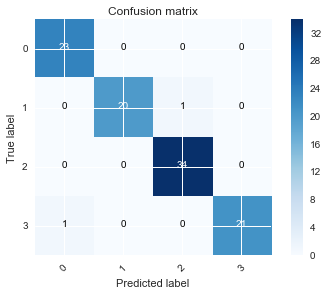

In [88]:
confusion_mat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(confusion_mat, [0, 1, 2, 3])

In [89]:
from sklearn.metrics import classification_report

In [90]:
print classification_report(y_test, y_test_pred)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        23
          1       1.00      0.95      0.98        21
          2       0.97      1.00      0.99        34
          3       1.00      0.95      0.98        22

avg / total       0.98      0.98      0.98       100

